In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [84]:
data=pd.read_csv("../data/kaggle-IndianStartup/startup_funding.csv")

In [85]:
data.shape

(3044, 10)

In [86]:
data.head(3)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN


In [87]:
# data.isnull().sum()
print(data.count()/data.isna().count()*100)

Sr No                100.000000
Date dd/mm/yyyy      100.000000
Startup Name         100.000000
Industry Vertical     94.382392
SubVertical           69.250986
City  Location        94.086728
Investors Name        99.211564
InvestmentnType       99.868594
Amount in USD         68.462549
Remarks               13.764783
dtype: float64


In [88]:
# As Data present in Remarks is 13.764783% so we will drop it
data.drop("Remarks", axis=1, inplace=True)

### Top 10 Investment types

In [89]:
data['InvestmentnType'] = data['InvestmentnType'].replace(['Seed/ Angel Funding',
                                                       'Seed / Angel Funding',
                                                       'Seed/Angel Funding',
                                                       'Angel / Seed Funding',
                                                       'Seed Funding'],'Seed / Angel Funding')

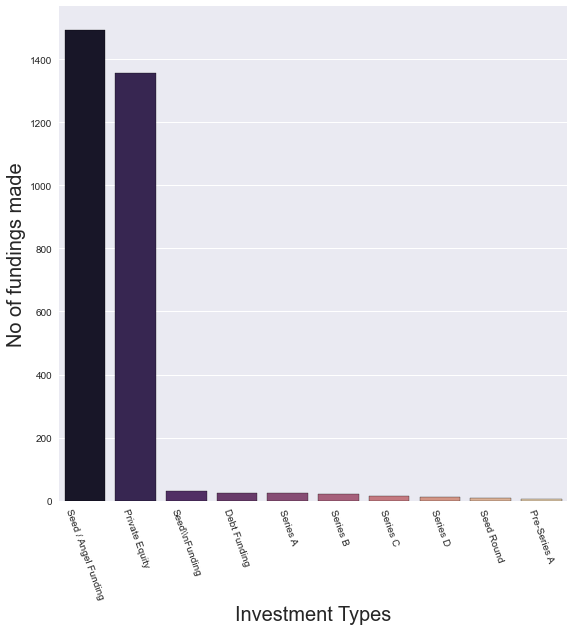

In [113]:
plt.style.use("seaborn")
Investment=data.InvestmentnType.value_counts()
plt.figure(figsize=(20,20))
plt.subplot(221)
fund= sns.barplot(x=Investment.index[:10],y=Investment.values[:10], palette="magma",edgecolor='black',saturation=0.50)
# sns.barplot()
fund.set_xticklabels(fund.get_xticklabels(),rotation=-70,fontsize=10)
fund.set_xlabel("Investment Types", fontsize=20,)
fund.set_ylabel("No of fundings made", fontsize=20)
plt.show()

In [102]:

colrs = [ 'darkorange','turquoise', 'gold','lightgreen']

fig=go.Figure(data=[go.Pie(labels=Investment.index[:5],values=Investment.values[:5])])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=10,
                  marker=dict(colors=colrs))
fig.data[0].marker.line.width = 1
fig.data[0].marker.line.color = "black"                
fig.update_layout(height=800,autosize=True ,plot_bgcolor='rgb(275, 275, 275)')
fig.show()

### Top 15 industry type

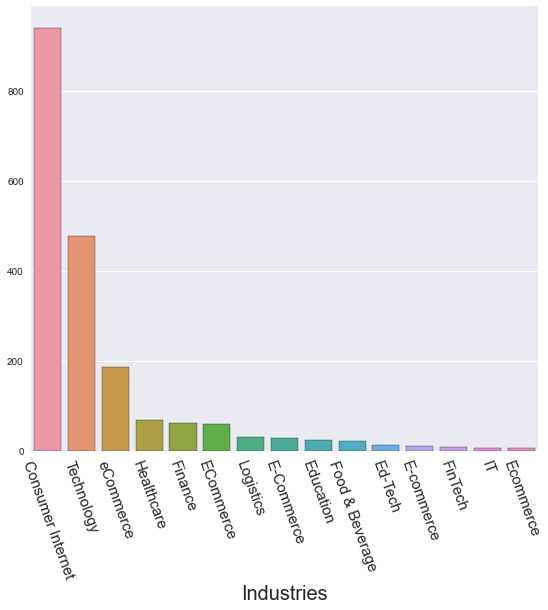

In [112]:
label10=np.arange(0,15)
top=data["Industry Vertical"].value_counts().head(15)
plt.figure(figsize=(20,18))
plt.subplot(221)
g = sns.barplot(x=top.index[:15],y=top.values[:15],edgecolor='black')
g.set_xticklabels(g.get_xticklabels(),rotation=-70, fontsize=15)
g.set_xlabel("Industries", fontsize=20)
plt.show()

### Top 20 Cities for Startup's Funding 

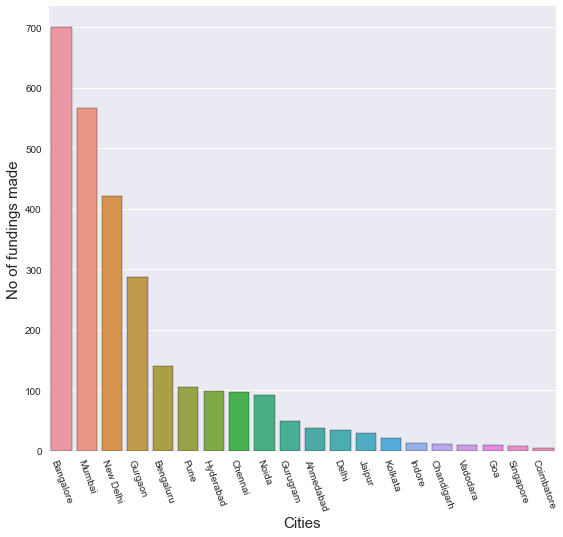

In [114]:
city=data['City  Location'].value_counts()
plt.figure(figsize=(20,18))
plt.subplot(221)
g = sns.barplot(x=city.index[:20],y=city.values[:20],edgecolor='black')
g.set_xticklabels(g.get_xticklabels(),rotation=-70, fontsize=10)
g.set_xlabel("Cities", fontsize=15)
g.set_ylabel("No of fundings made", fontsize=15)
plt.show()